# Lab | Making predictions with logistic regression


In this lab, you will be using the Sakila database of movie rentals.

In order to optimize our inventory, we would like to know which films will be rented next month and we are asked to create a model to predict it.

Instructions

1. Create a query or queries to extract the information you think may be relevant for building the prediction model. It should include some film features and some rental features.

2. Read the data into a Pandas dataframe.

3. Analyze extracted features and transform them. You may need to encode some categorical variables, or scale numerical variables.

4. Create a query to get the list of films and a boolean indicating if it was rented last month. This would be our target variable.

5. Create a logistic regression model to predict this variable from the cleaned data.

6. Evaluate the results.

In [1]:
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import getpass
import seaborn as sns
import matplotlib.pyplot as plt

password = getpass.getpass()

# imhm281093

········


In [2]:
connection_string="mysql+pymysql://root:" + password + "@localhost/sakila"
engine=create_engine(connection_string)

query='''SELECT f.*
FROM sakila.rental r 
JOIN sakila.inventory i USING (inventory_id)
JOIN sakila.film f USING (film_id)
GROUP BY f.title, f.film_id, f.rating, f.rental_rate, f.language_id, f.release_year, f.rental_duration, f.length, f.replacement_cost;'''

data=pd.read_sql_query(query,engine)
data.head()

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,None,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2006-02-15 05:03:42
1,2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,2006,1,None,3,4.99,48,12.99,G,"Trailers,Deleted Scenes",2006-02-15 05:03:42
2,3,ADAPTATION HOLES,A Astounding Reflection of a Lumberjack And a ...,2006,1,None,7,2.99,50,18.99,NC-17,"Trailers,Deleted Scenes",2006-02-15 05:03:42
3,4,AFFAIR PREJUDICE,A Fanciful Documentary of a Frisbee And a Lumb...,2006,1,None,5,2.99,117,26.99,G,"Commentaries,Behind the Scenes",2006-02-15 05:03:42
4,5,AFRICAN EGG,A Fast-Paced Documentary of a Pastry Chef And ...,2006,1,None,6,2.99,130,22.99,G,Deleted Scenes,2006-02-15 05:03:42


In [3]:
data.shape

(958, 13)

In [4]:
data.dtypes

film_id                          int64
title                           object
description                     object
release_year                     int64
language_id                      int64
original_language_id            object
rental_duration                  int64
rental_rate                    float64
length                           int64
replacement_cost               float64
rating                          object
special_features                object
last_update             datetime64[ns]
dtype: object

In [19]:
data.isna().sum()

film_id             0
title               0
description         0
release_year        0
language_id         0
rental_duration     0
rental_rate         0
length              0
replacement_cost    0
rating              0
special_features    0
dtype: int64

In [21]:
data.isna().sum().sum()

0

In [22]:
data.head()

,film_id,title,description,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes"
1,2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,2006,1,3,4.99,48,12.99,G,"Trailers,Deleted Scenes"
2,3,ADAPTATION HOLES,A Astounding Reflection of a Lumberjack And a ...,2006,1,7,2.99,50,18.99,NC-17,"Trailers,Deleted Scenes"
3,4,AFFAIR PREJUDICE,A Fanciful Documentary of a Frisbee And a Lumb...,2006,1,5,2.99,117,26.99,G,"Commentaries,Behind the Scenes"
4,5,AFRICAN EGG,A Fast-Paced Documentary of a Pastry Chef And ...,2006,1,6,2.99,130,22.99,G,Deleted Scenes


In [20]:
data.dtypes

film_id               int64
title                object
description          object
release_year          int64
language_id           int64
rental_duration       int64
rental_rate         float64
length                int64
replacement_cost    float64
rating               object
special_features     object
dtype: object

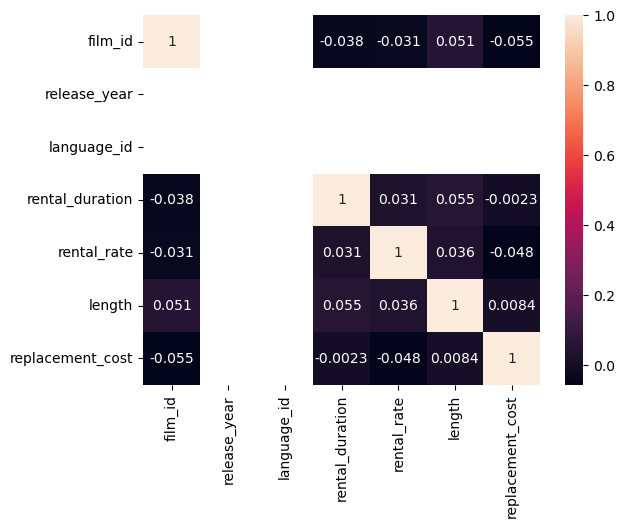

In [24]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show() #multicollinearity

In [25]:
data = data.drop(['release_year', 'language_id'], axis=1)

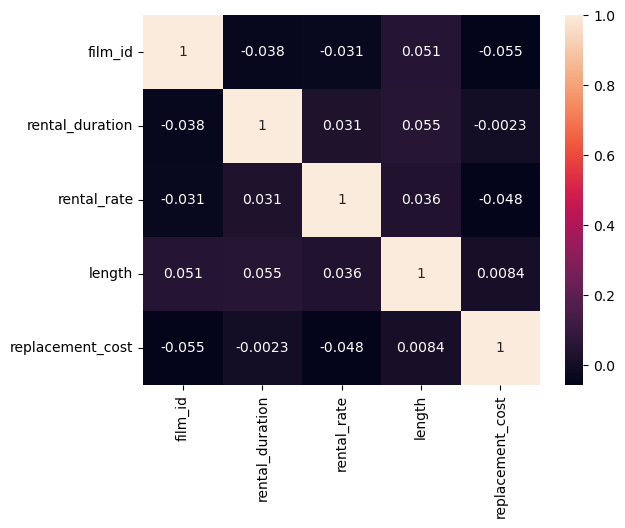

In [26]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show() #multicollinearity

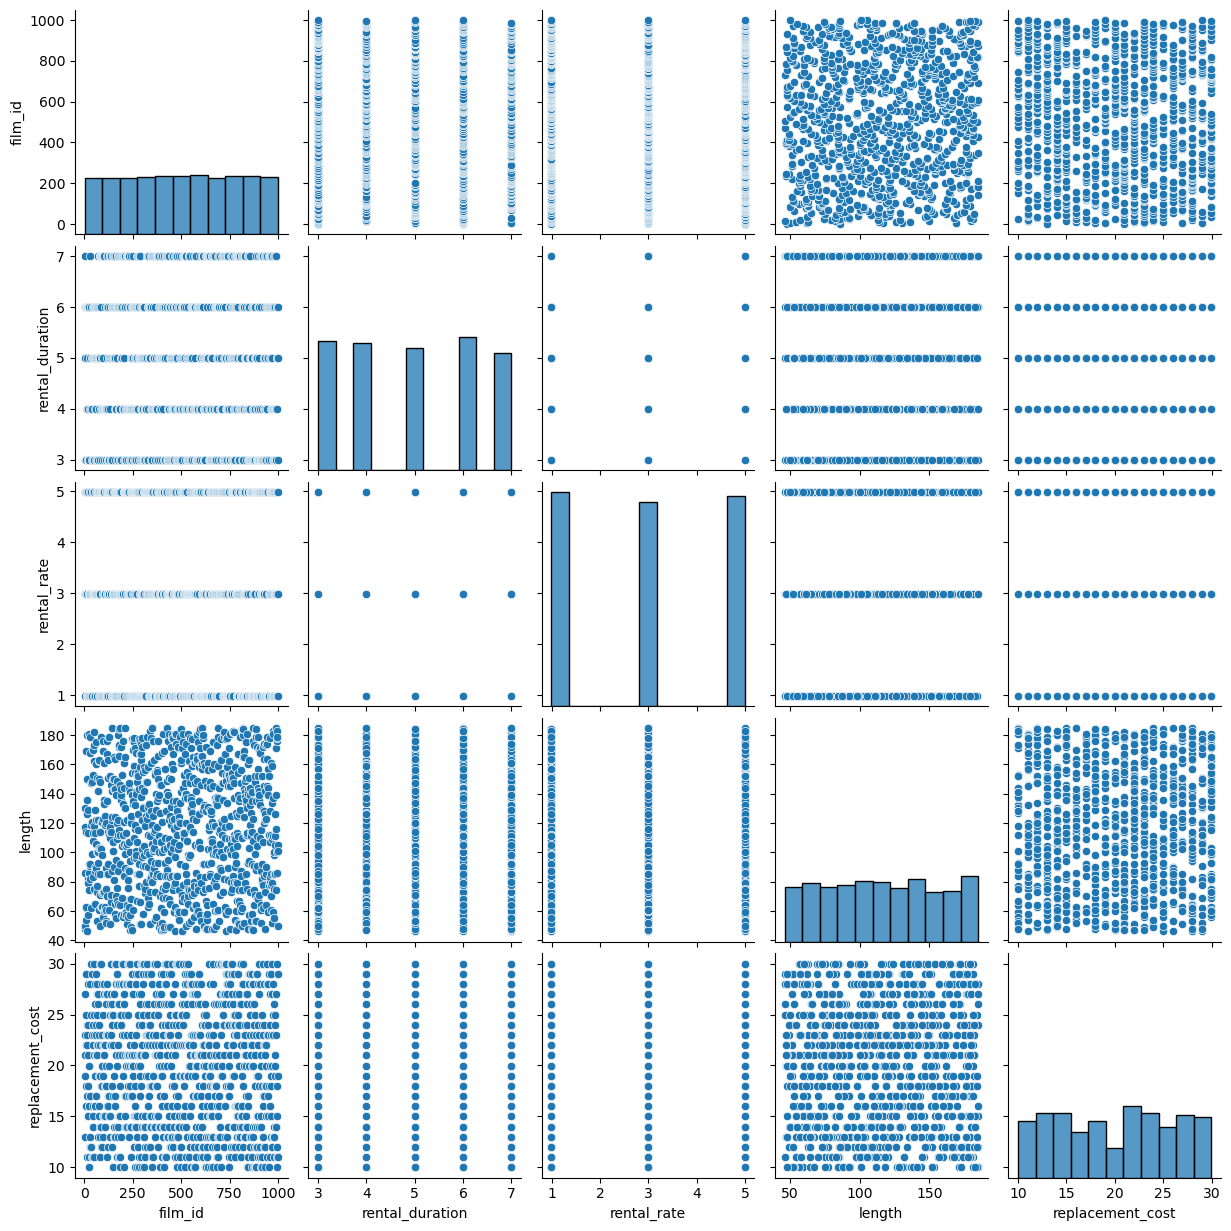

In [27]:
sns.pairplot(data)
plt.show()

In [28]:
import numpy as np
from sklearn.preprocessing import Normalizer

X = data.select_dtypes(include = np.number)
X.head()

,film_id,rental_duration,rental_rate,length,replacement_cost
0,1,6,0.99,86,20.99
1,2,3,4.99,48,12.99
2,3,7,2.99,50,18.99
3,4,5,2.99,117,26.99
4,5,6,2.99,130,22.99


In [29]:
transformer = Normalizer().fit(X)
x_normalized = transformer.transform(X)
x = pd.DataFrame(x_normalized)
x.columns = X.columns
x

,film_id,rental_duration,rental_rate,length,replacement_cost
0,0.011269,0.067614,0.011156,0.969137,0.236537
1,0.039915,0.059873,0.099588,0.957964,0.259249
2,0.055446,0.129373,0.055261,0.924096,0.350972
3,0.033256,0.041569,0.024859,0.972726,0.224392
4,0.037798,0.045358,0.022603,0.982750,0.173796
...,...,...,...,...,...
953,0.983471,0.005925,0.000978,0.180698,0.009864
954,0.984147,0.003948,0.000977,0.176692,0.014797
955,0.994433,0.005979,0.000986,0.104625,0.010951
956,0.994497,0.004977,0.002977,0.100545,0.028859


In [30]:
cat = data.select_dtypes(include = object)
cat

,title,description,rating,special_features
0,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,PG,"Deleted Scenes,Behind the Scenes"
1,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,G,"Trailers,Deleted Scenes"
2,ADAPTATION HOLES,A Astounding Reflection of a Lumberjack And a ...,NC-17,"Trailers,Deleted Scenes"
3,AFFAIR PREJUDICE,A Fanciful Documentary of a Frisbee And a Lumb...,G,"Commentaries,Behind the Scenes"
4,AFRICAN EGG,A Fast-Paced Documentary of a Pastry Chef And ...,G,Deleted Scenes
...,...,...,...,...
953,YOUNG LANGUAGE,A Unbelieveable Yarn of a Boat And a Database ...,G,"Trailers,Behind the Scenes"
954,YOUTH KICK,A Touching Drama of a Teacher And a Cat who mu...,NC-17,"Trailers,Behind the Scenes"
955,ZHIVAGO CORE,A Fateful Yarn of a Composer And a Man who mus...,NC-17,Deleted Scenes
956,ZOOLANDER FICTION,A Fateful Reflection of a Waitress And a Boat ...,R,"Trailers,Deleted Scenes"


In [31]:
categorical = pd.get_dummies(cat, columns = ['title', 'description', 'rating', 'special_features'])
categorical 

,title_ACADEMY DINOSAUR,title_ACE GOLDFINGER,title_ADAPTATION HOLES,title_AFFAIR PREJUDICE,title_AFRICAN EGG,title_AGENT TRUMAN,title_AIRPLANE SIERRA,title_AIRPORT POLLOCK,title_ALABAMA DEVIL,title_ALADDIN CALENDAR,...,special_features_Deleted Scenes,"special_features_Deleted Scenes,Behind the Scenes",special_features_Trailers,"special_features_Trailers,Behind the Scenes","special_features_Trailers,Commentaries","special_features_Trailers,Commentaries,Behind the Scenes","special_features_Trailers,Commentaries,Deleted Scenes","special_features_Trailers,Commentaries,Deleted Scenes,Behind the Scenes","special_features_Trailers,Deleted Scenes","special_features_Trailers,Deleted Scenes,Behind the Scenes"
0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
954,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
955,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
956,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [51]:
query='''SELECT f.title,
    CASE WHEN max(r.rental_date) = (SELECT max(rental_date) FROM sakila.rental) THEN 'True'
    ELSE 'False'
    END AS 'rented_last_month'
FROM sakila.film f
JOIN sakila.inventory i USING(film_id)
JOIN sakila.rental r USING(inventory_id)
GROUP BY title'''

data=pd.read_sql_query(query,engine)
data

,title,rented_last_month
0,ACADEMY DINOSAUR,False
1,ACE GOLDFINGER,True
2,ADAPTATION HOLES,False
3,AFFAIR PREJUDICE,True
4,AFRICAN EGG,True
...,...,...
953,YOUNG LANGUAGE,False
954,YOUTH KICK,False
955,ZHIVAGO CORE,True
956,ZOOLANDER FICTION,False


In [52]:
data = data.drop(['title'], axis=1)
X = np.concatenate ((x, categorical), axis=1) # joining the data together
y = data['rented_last_month']

In [53]:
data.shape

(958, 1)

In [54]:
X.shape

(958, 1941)

In [55]:
y.shape

(958,)

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

In [57]:
from sklearn.linear_model import LogisticRegression

classification = LogisticRegression().fit(X_train, y_train)

In [58]:
predictions = classification.predict(X_test)
predictions

array(['False', 'False', 'False', 'False', 'False', 'False', 'False',
       'False', 'False', 'False', 'False', 'False', 'False', 'False',
       'False', 'False', 'False', 'False', 'False', 'False', 'False',
       'False', 'False', 'False', 'False', 'False', 'False', 'False',
       'False', 'False', 'False', 'False', 'False', 'False', 'False',
       'False', 'False', 'False', 'False', 'False', 'False', 'False',
       'False', 'False', 'False', 'False', 'False', 'False', 'False',
       'False', 'False', 'False', 'False', 'False', 'False', 'False',
       'False', 'False', 'False', 'False', 'False', 'False', 'False',
       'False', 'False', 'False', 'False', 'False', 'False', 'False',
       'False', 'False', 'False', 'False', 'False', 'False', 'False',
       'False', 'False', 'False', 'False', 'False', 'False', 'False',
       'False', 'False', 'False', 'False', 'False', 'False', 'False',
       'False', 'False', 'False', 'False', 'False', 'False', 'False',
       'False', 'Fal

In [59]:
classification.score(X_test,y_test)

0.8203125

In [60]:
y_test.value_counts()

False    315
True      69
Name: rented_last_month, dtype: int64

In [61]:
pd.Series(predictions).value_counts()

False    384
dtype: int64

In [62]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[315,   0],
       [ 69,   0]])

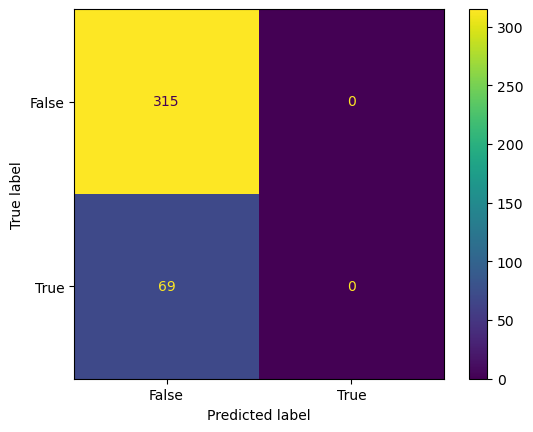

In [63]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predictions, labels=classification.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classification.classes_)
disp.plot()

plt.show()

In [64]:
# The model is imbalanced, apart of having predict with 82% of fiability from both values 'True' and 'False'
# had an 82% only prediciting 'False' values.